<center><h1>   A Fuzzy Logic System for predicting the outcome of a cricket match based on the team's performance,
players' statistics, and weather conditions </h1></center>

## Import Libraries

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib
import pickle
import matplotlib.pyplot as plt


%matplotlib inline

## Define the input variables

In [2]:
team_performance = ctrl.Antecedent(np.arange(0, 101, 1), 'team_performance')
players_statistics = ctrl.Antecedent(np.arange(0, 101, 1), 'players_statistics')
weather_conditions = ctrl.Antecedent(np.arange(0, 101, 1), 'weather_conditions')

## Define output variables

In [3]:
match_outcome = ctrl.Consequent(np.arange(0, 101, 1), 'match_outcome')

## Define the membership functions for team_performance

c:\Users\XPRISTO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


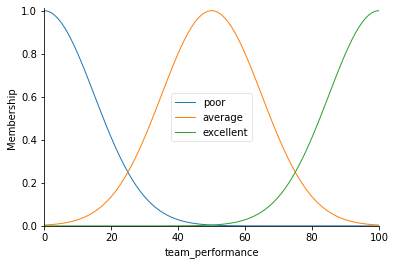

In [4]:
team_performance['poor'] = fuzz.gaussmf(team_performance.universe , 0 , 15)
team_performance['average'] = fuzz.gaussmf(team_performance.universe , 50, 15)
team_performance['excellent'] = fuzz.gaussmf(team_performance.universe , 100, 15)
team_performance.view()

## Define the membership functions for players_statistics

c:\Users\XPRISTO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


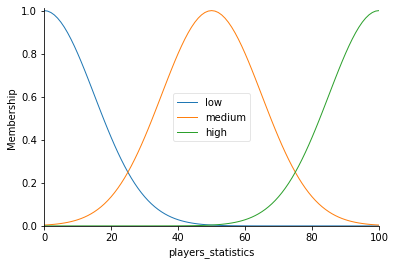

In [5]:
players_statistics['low'] = fuzz.gaussmf(players_statistics.universe, 0, 15)
players_statistics['medium'] = fuzz.gaussmf(players_statistics.universe, 50, 15)
players_statistics['high'] =  fuzz.gaussmf(players_statistics.universe, 100, 15)
players_statistics.view()

## Define the membership functions for weather_conditions

c:\Users\XPRISTO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


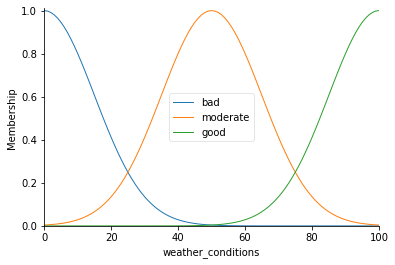

In [6]:
weather_conditions['bad'] = fuzz.gaussmf(weather_conditions.universe, 0, 15)
weather_conditions['moderate'] = fuzz.gaussmf(weather_conditions.universe, 50, 15)
weather_conditions['good'] = fuzz.gaussmf(weather_conditions.universe, 100, 15)
weather_conditions.view()

## Define the membership functions for the output variable

c:\Users\XPRISTO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


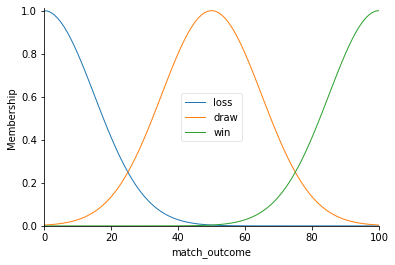

In [7]:
match_outcome['loss'] = fuzz.gaussmf(match_outcome.universe, 0, 15)
match_outcome['draw'] = fuzz.gaussmf(match_outcome.universe, 50, 15)
match_outcome['win'] = fuzz.gaussmf(match_outcome.universe, 100, 15)
match_outcome.view()

## Define the rules

Fuzzy Rules:

1-If team_performance is poor and players_statistics is low and weather_conditions is bad, then match_outcome is loss.

2-If team_performance is excellent or players_statistics is high, then match_outcome is win.

3-If weather_conditions is good and (team_performance is average or players_statistics is medium), then match_outcome is win.

4-If team_performance is average and players_statistics is medium and weather_conditions is Moderate, then match_outcome is draw.

5-If team_performance is poor and (players_statistics is low or weather_conditionsis bad), then match_outcomeis loss.

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

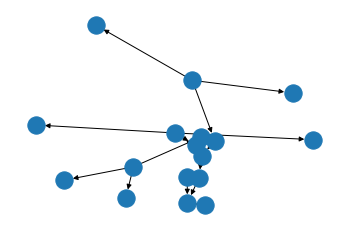

In [8]:
rule1 = ctrl.Rule(team_performance['poor'] & players_statistics['low'] & weather_conditions['bad'], match_outcome['loss'])
rule2 = ctrl.Rule(team_performance['average'] & players_statistics['medium'] & weather_conditions['moderate'], match_outcome['draw'])
rule3 = ctrl.Rule(team_performance['excellent'] & players_statistics['high'] & weather_conditions['good'], match_outcome['win'])
rule4 = ctrl.Rule(team_performance['poor'] & players_statistics['high'] & weather_conditions['good'], match_outcome['loss'])
rule5 = ctrl.Rule(team_performance['excellent'] & players_statistics['low'] & weather_conditions['bad'], match_outcome['win'])
rule3.view()

## Create the control system

In [9]:
match_outcome_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
match_outcome_predict = ctrl.ControlSystemSimulation(match_outcome_ctrl)

## Pass the input values to the control system

In [10]:
match_outcome_predict.input['team_performance'] = 10
match_outcome_predict.input['players_statistics'] = 10
match_outcome_predict.input['weather_conditions'] = 10

# Compute the output value
match_outcome_predict.compute()

## Categorize the result

In [11]:
def categorize_outcome(outcome):
    if outcome < 40:
        return 'Loss'
    elif 40 <= outcome < 70:
        return 'Draw'
    else:
        return 'Win'

In [12]:
match_outcome_predict.output['match_outcome']

16.84687671674746

In [13]:
print('match outcome Condition Crisp Number:', match_outcome_predict.output['match_outcome'])

match outcome Condition Crisp Number: 16.84687671674746


## Visualize the results

match_outcome  Condition Crisp Number: 16.84687671674746


c:\Users\XPRISTO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


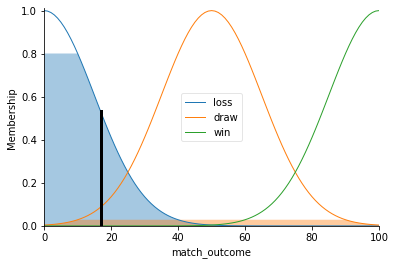

In [14]:
print('match_outcome  Condition Crisp Number:', match_outcome_predict.output['match_outcome'])
categorize_outcome(match_outcome_predict.output['match_outcome'])
match_outcome.view(sim=match_outcome_predict)

## Save the fuzzy system to a file

In [15]:
# Save the fuzzy system to a file
with open('match_outcome.pickle', 'wb') as f:
    pickle.dump(match_outcome_ctrl, f)

In [16]:
with open('match_outcome.pickle', 'rb') as f:
    match_outcome_ctrl = pickle.load(f)

def run_fuzzy_system(team_performance, players_statistics, weather_conditions):
    match_outcome = ctrl.ControlSystemSimulation(match_outcome_ctrl)
    match_outcome.input["team_performance"] = team_performance
    match_outcome.input["players_statistics"] = players_statistics
    match_outcome.input["weather_conditions"] = weather_conditions
    match_outcome.compute()

    crisp_values = match_outcome.output["match_outcome"]
    return categorize_outcome(crisp_values)

In [17]:
run_fuzzy_system(10,10,10)

'Loss'